# Precios de Alquileres en Barcelona VS Nivel de ruido por Bario en 2017

## 0.Introdución

Este proyecto se presenta como una prueba técnica en el contexto del Hackathon de Data Science organizado por Jump2Digital.

En este proyecto, exploraremos la relación entre los precios de alquiler y la exposición a ruidos en la ciudad de Barcelona utilizando conjuntos de datos proporcionados por Open Data Barcelona. Nuestro análisis se realizará siguiendo prácticas de ciencia de datos y técnicas de preprocesamiento, análisis estadístico y visualización. Los resultados de este proyecto no solo enriquecerán nuestra comprensión de los factores que influyen en los precios de alquiler, sino que también servirán como una prueba de habilidades para el Hackathon de Data Science de Jump2Digital.

Esperamos que este proyecto proporcione información valiosa y contribuya al desafío del Hackathon. ¡Comencemos nuestro viaje en el mundo de los datos en Barcelona y demos lo mejor de nosotros en esta prueba técnica!

## I. Importar Librerías, Cargar los Datasets y Unirlos

### 1. Importar las librerías

In [2]:
# Importar librerias

# Datos
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

### 2. Importar los Datasets

In [3]:
# Load the dataset : "Alquiler mensual medio (€/mes) y por superficie (€/ m2) de la ciudad de Barcelona" on pandas
df_price = pd.read_csv(r"G:\Mi unidad\Data Science\Portfolio Project\Hackathon JUMP2DIGITAL\bases_de_datos\2017_lloguer_preu_trim.csv")


# Load the dataset : "Población expuesta a los niveles de ruido del Mapa Estratégico de Ruido de la ciudad de Barcelona" on pandas
df_noise = pd.read_csv(r"G:\Mi unidad\Data Science\Portfolio Project\Hackathon JUMP2DIGITAL\bases_de_datos\2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv")

In [4]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [5]:
df_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  18980 non-null  int64 
 1   Nom_Districte   18980 non-null  object
 2   Codi_Barri      18980 non-null  int64 
 3   Nom_Barri       18980 non-null  object
 4   Concepte        18980 non-null  object
 5   Rang_soroll     18980 non-null  object
 6   Valor           18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


Tenemos el dataset de precio con 584 filas contra el dataset de ruidos con 18980 filas

Las columnas que son identicas entre los 2 datasets:
- Codi_Districte
- Nom_Districte
- Codi_Barri
- Nom_Barri

In [6]:
# Miramos las primeras/ultimas filas de cada dataset :
df_price.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [7]:
df_price.tail()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
579,2017,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.51
580,2017,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.40
581,2017,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),12.66
582,2017,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),10.83
583,2017,4,10,Sant Martí,73,la Verneda i la Pau,Lloguer mitjà per superfície (Euros/m2 mes),10.38


En el dataset de precio, podemos observar que para los 73 barrios de Barcelona aparece el precio por alquiler por mes y el precio por superficie de cada trimestre de 2017.

In [8]:
df_noise.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [9]:
df_noise.tail()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
18975,10,Sant Martí,73,la Verneda i la Pau,PARCS_D,60-65 dB,0.00%
18976,10,Sant Martí,73,la Verneda i la Pau,PARCS_D,65-70 dB,0.00%
18977,10,Sant Martí,73,la Verneda i la Pau,PARCS_D,70-75 dB,0.00%
18978,10,Sant Martí,73,la Verneda i la Pau,PARCS_D,75-80 dB,0.00%
18979,10,Sant Martí,73,la Verneda i la Pau,PARCS_D,>=80 dB,0.00%


In [10]:
df_noise["Concepte"].unique()

array(['TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D',
       'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN', 'GI_TR_D', 'GI_TR_E',
       'GI_TR_N', 'GI_TR_DEN', 'FFCC_D', 'FFCC_E', 'FFCC_N', 'FFCC_DEN',
       'INDUST_D', 'INDUST_E', 'INDUST_N', 'INDUST_DEN', 'VIANANTS_D',
       'VIANANTS_E', 'OCI_N', 'PATIS_D', 'PATIS_E', 'PARCS_D'],
      dtype=object)

Explicaciones de la columna "Concepte" . Fuente : el sitio web de Opendata Ajuntament Barcelona:

https://ajuntament.barcelona.cat/ecologiaurbana/es/mapas-datos-ambientales

1. INDICES (TRANSIT, GI_TR, FFCC, INDUST, VIANANTS, OCI, PATIS, PARCS) 

Fuentes de ruido exigidas por normativa:

Tráfico viario (TRANSIT) // Grandes infraestructuras viarias (GI_TR) // Ejes ferroviarios y tranvía (FFCC) // Industria (INDUST)

También se han estudiado de manera detallada otros tipos de emisores y receptores de ruido no exigibles por normativa:

Ocio y aglomeración de personas (OCI) // Calles peatonales (VIANANTS) // Parques (PARCS) // Patios interiores (PATIS)

2. INDICES (D, E, N, DEN)
Para la evaluación del ruido hay tres períodos horarios definidos por normativa. 

El período día (D) es de 7.00 a 21.00 horas

La tarde (E), de 21.00 a 23.00 horas

La noche (N), de 23.00 a 7.00 horas.

De estos tres períodos se obtienen los índices acústicos D, E y N. Además, hay un cuarto índice acústico, 
El ponderado día-tarde-noche (DEN), que corresponde a una media ponderada de los índices Ld, Le y Ln, penalizando los períodos tarde y noche."

In [11]:
#Visualización del Indice ponderado DEN que contiene el TOTAL:

df_noise[df_noise['Concepte'] == "TOTAL_DEN"]

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
2190,1,Ciutat Vella,1,el Raval,TOTAL_DEN,<40 dB,0.27%
2191,1,Ciutat Vella,1,el Raval,TOTAL_DEN,40-45 dB,28.36%
2192,1,Ciutat Vella,1,el Raval,TOTAL_DEN,45-50 dB,11.97%
2193,1,Ciutat Vella,1,el Raval,TOTAL_DEN,50-55 dB,7.95%
2194,1,Ciutat Vella,1,el Raval,TOTAL_DEN,55-60 dB,15.40%
...,...,...,...,...,...,...,...
2915,10,Sant Martí,73,la Verneda i la Pau,TOTAL_DEN,60-65 dB,21.59%
2916,10,Sant Martí,73,la Verneda i la Pau,TOTAL_DEN,65-70 dB,13.08%
2917,10,Sant Martí,73,la Verneda i la Pau,TOTAL_DEN,70-75 dB,4.05%
2918,10,Sant Martí,73,la Verneda i la Pau,TOTAL_DEN,75-80 dB,0.00%


### 3. Merging los datasets :

Después de un primero vistazo a los datasets aparece que cada barrio aparece varias veces en cada uno de los datasets. Para poder proceder al merge, vamos a tener que hacer un merge de tipo "outer join".

In [12]:
print("Data set Ruido : Numero de filas por Barrio:\n", df_noise["Nom_Barri"].value_counts()
      ,"\n", "Data set Precio : Numero de filas por Barrio:", df_price["Nom_Barri"].value_counts())

#Observamos las veces que se repiten los barrios en cada dataset :

Data set Ruido : Numero de filas por Barrio:
 el Raval                                 260
la Teixonera                             260
Torre Baró                               260
la Trinitat Nova                         260
la Prosperitat                           260
                                        ... 
Sant Gervasi - la Bonanova               260
les Tres Torres                          260
Sarrià                                   260
Vallvidrera, el Tibidabo i les Planes    260
la Verneda i la Pau                      260
Name: Nom_Barri, Length: 73, dtype: int64 
 Data set Precio : Numero de filas por Barrio: el Raval                                 8
la Teixonera                             8
Torre Baró                               8
la Trinitat Nova                         8
la Prosperitat                           8
                                        ..
Sant Gervasi - la Bonanova               8
les Tres Torres                          8
Sarrià                   

In [13]:
#Tenemos una relacion de 260 filas por Barrio en el dataset Ruido por 8 filas por Barrio en el dataset de precio. Tenemos 73 Barrios diferentes :
print("El numero de filas del Outer Join tiene que ser:", 8*260*73)

El numero de filas del Outer Join tiene que ser: 151840


In [14]:
#Realización de la unión de los 2 conjuntos de datos
df_merge = df_noise.merge(
    df_price,
    how="outer",
    on=["Codi_Districte", "Nom_Districte",	"Codi_Barri", "Nom_Barri"]
    )

#Confirmamos el exito del Merge:
print("Tamaño del Dataset Merged:",df_merge.shape)

Tamaño del Dataset Merged: (151840, 11)


El Outter join ha sido correcto

## II. Exploratory Data Analysis

### 1. Precio pisos

In [15]:
#Crear un dataset con los valores de precio por "Lloguer mitjà per superfície (Euros/m2 mes)"
df_price_EURm2 = df_price[df_price["Lloguer_mitja"] == "Lloguer mitjà per superfície (Euros/m2 mes)"]

#Crear un dataset con los valores de precio por "Lloguer mitjà mensual (Euros/mes)"
df_price_mensual = df_price[df_price["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]

[]

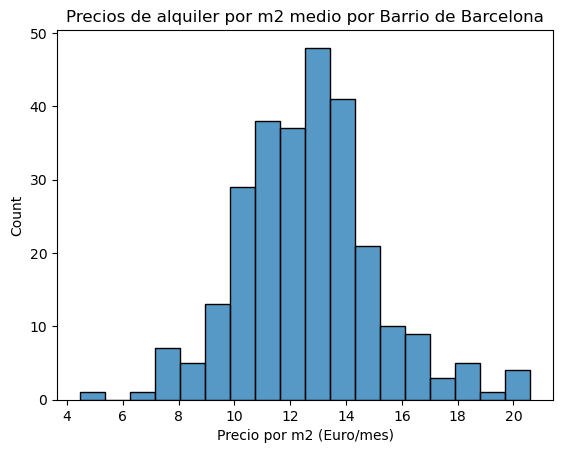

In [19]:
#Observar la disribución de los precios por m2
sns.histplot(data=df_price_EURm2, x="Preu")
plt.title("Precios de alquiler por m2 medio por Barrio de Barcelona")
plt.xlabel("Precio por m2 (Euro/mes)")
plt.plot()

Observamos que nuestro dataset parece tener una distribución normal. Con un precio medio de 13€ y distribuidos entre 5 y 20€.

[]

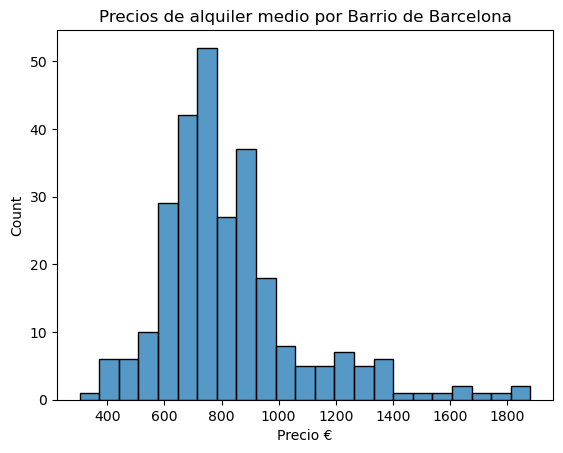

In [20]:
#Observar la disribución de los precios mensuales
sns.histplot(data=df_price_mensual, x="Preu")
plt.title("Precios de alquiler medio por Barrio de Barcelona")
plt.xlabel("Precio €")
plt.plot()

Observamos una distribución clasica para precios de datos asimétricos a la izquierda con una cola positiva. El valor medio de alquiler entre los barios de Barcelona parece situarse alrededor de los 700€ mensual.

[]

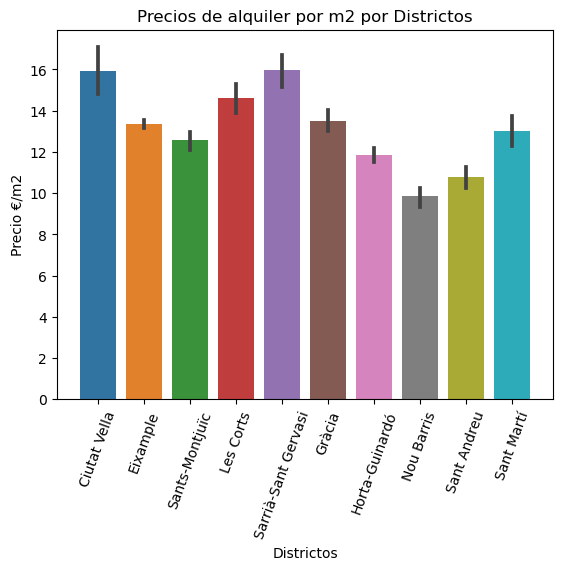

In [26]:
#Observación de los precio por m2 por Districtos
sns.barplot(data=df_price_EURm2, x="Nom_Districte", y="Preu")
plt.title("Precios de alquiler por m2 por Districtos")
plt.xlabel("Districtos")
plt.ylabel("Precio €/m2")
plt.xticks(rotation=70)
plt.plot()

Los districtos de Ciutat Vella (16€) y de Sarrià-Sant Gervasi (16€) parecen tener los precios medios más altos en los barrios que los componen.

Al contrario Nou Barris (10€) y Sant Andreu (11€), tendrián los precios más bajos.

[]

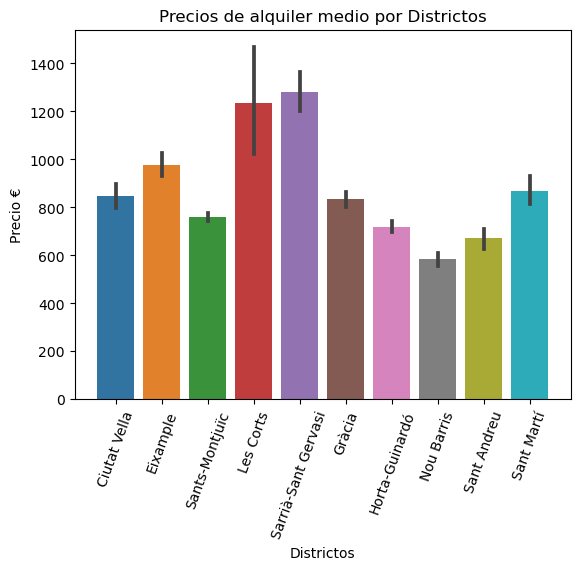

In [27]:
#Observación de los precio de alquiler por Districtos
sns.barplot(data=df_price_mensual, x="Nom_Districte", y="Preu")
plt.title("Precios de alquiler medio por Districtos")
plt.xlabel("Districtos")
plt.ylabel("Precio €")
plt.xticks(rotation=70)
plt.plot()

Observamos que los dos discritos con alquileres más altos son Sarrià-Sant Gervasi (1250€) y Les Corts (1200€). Ciutat Vella (850€) parece tener pisos pequeños. Al contrario de Les Corts, podemos observar que tiene diferencias importantes entre los precios en este districto.

Los Districtos con el alquiler medio lo más economicos son Nou Barris (550€) y Sant Andreu (650€)

## III. Preprocesamiento de los datos

## 1. Eliminación de valores faltantes

In [14]:
#Observación de la proporción de valores faltantes
print("% de Valores Faltantes por Feature:\n",df_merge.isna().mean().mul(100), "\n")

#Supresión de los valores faltantes
df_merge.dropna(inplace=True)

#Comprobación de su elimación
print("Numeros de valores faltantes:\n", sum(df_merge.isna().sum()))

% de Valores Faltantes por Feature:
 Codi_Districte    0.000000
Nom_Districte     0.000000
Codi_Barri        0.000000
Nom_Barri         0.000000
Concepte          0.000000
Rang_soroll       0.000000
Valor             0.000000
Any               0.000000
Trimestre         0.000000
Lloguer_mitja     0.000000
Preu              6.506849
dtype: float64 

Numeros de valores faltantes:
 0


### 2. Valores duplicados

In [15]:
#Suma de las filas duplicadas:
print("Filas duplicadas:\n", df_merge.duplicated().sum(),"\n")

#Observación de las filas duplicadas:
print(df_merge[df_merge.duplicated()])

Filas duplicadas:
 0 

Empty DataFrame
Columns: [Codi_Districte, Nom_Districte, Codi_Barri, Nom_Barri, Concepte, Rang_soroll, Valor, Any, Trimestre, Lloguer_mitja, Preu]
Index: []


### 3. Transformar las variables en numericas

In [16]:
df_merge.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Any,Trimestre,Lloguer_mitja,Preu
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%,2017,1,Lloguer mitjà mensual (Euros/mes),734.99
1,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%,2017,2,Lloguer mitjà mensual (Euros/mes),714.29
2,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%,2017,3,Lloguer mitjà mensual (Euros/mes),764.85
3,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%,2017,4,Lloguer mitjà mensual (Euros/mes),776.73
4,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%,2017,1,Lloguer mitjà per superfície (Euros/m2 mes),13.50


In [17]:
#Observación de las diferentes variables en nuestro dataset:
print(df_merge.info(), "\n")

categories = df_merge.select_dtypes(include='object').columns

for i in categories:
  print(i)
  print(np.sort(df_merge[i].unique()), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141960 entries, 0 to 151839
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Codi_Districte  141960 non-null  int64  
 1   Nom_Districte   141960 non-null  object 
 2   Codi_Barri      141960 non-null  int64  
 3   Nom_Barri       141960 non-null  object 
 4   Concepte        141960 non-null  object 
 5   Rang_soroll     141960 non-null  object 
 6   Valor           141960 non-null  object 
 7   Any             141960 non-null  int64  
 8   Trimestre       141960 non-null  int64  
 9   Lloguer_mitja   141960 non-null  object 
 10  Preu            141960 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 13.0+ MB
None 

Nom_Districte
['Ciutat Vella' 'Eixample' 'Gràcia' 'Horta-Guinardó' 'Les Corts'
 'Nou Barris' 'Sant Andreu' 'Sant Martí' 'Sants-Montjuïc'
 'Sarrià-Sant Gervasi'] 

Nom_Barri
['Can Baró' 'Can Peguera' 'Canyelles' 'Ciutat Me

1. Nom_Districte y Nom_Barri tienen variables numericas equivalentes en el dataset : Codi_Districte y Codi_Barri:
    => Las podemos eliminar

2. Valor son porcentajes (Numericos) tratados como categoricos
    => Le convertimos en numericos

3. Rang_soroll y Lloguer_mitja
    => Le pasamos por un One Hot Encoding para transformarlas en variables numericas

In [18]:
#Eliminar las columnas Nom_Districte y Nom_Barri:
df_merge.drop(columns=["Nom_Districte", "Nom_Barri"], inplace=True)

#Eliminar los "%" de la columna "Valor" y Convertirla en una columna numerica
df_merge["Valor"] = df_merge["Valor"].str.replace("%", "").astype('float64')

In [19]:
#Actualización de la lista de columna categoricas:
categories = df_merge.select_dtypes(include='object').columns

#One Hot Encoding de Rang_soroll y Lloguer_mitja:
df_clean = pd.get_dummies(data=df_merge,
                  columns=categories,
                  dtype="int8")

print("df_clean Size:\n",df_clean.shape, "\n")

df_clean Size:
 (141960, 44) 



In [20]:
df_clean.head()

,Codi_Districte,Codi_Barri,Valor,Any,Trimestre,Preu,Concepte_FFCC_D,Concepte_FFCC_DEN,Concepte_FFCC_E,Concepte_FFCC_N,...,Rang_soroll_50-55 dB,Rang_soroll_55-60 dB,Rang_soroll_60-65 dB,Rang_soroll_65-70 dB,Rang_soroll_70-75 dB,Rang_soroll_75-80 dB,Rang_soroll_<40 dB,Rang_soroll_>=80 dB,Lloguer_mitja_Lloguer mitjà mensual (Euros/mes),Lloguer_mitja_Lloguer mitjà per superfície (Euros/m2 mes)
0,1,1,7.73,2017,1,734.99,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,1,7.73,2017,2,714.29,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,1,7.73,2017,3,764.85,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,1,7.73,2017,4,776.73,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,1,7.73,2017,1,13.50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### 4. Estandarización de variables:

In [21]:
# Creación del Scaler
scaler = StandardScaler()

# Ajustar el Scaler a los datos y estandarizar las variables
df_clean_std = scaler.fit_transform(df_clean)

# Crear un DataFrame con los datos estandarizados y mantener los nombres de columnas e índices
df_clean_std = pd.DataFrame(df_clean_std, columns = df_clean.columns, index= df_clean.index)

#Visualización
df_clean_std

,Codi_Districte,Codi_Barri,Valor,Any,Trimestre,Preu,Concepte_FFCC_D,Concepte_FFCC_DEN,Concepte_FFCC_E,Concepte_FFCC_N,...,Rang_soroll_50-55 dB,Rang_soroll_55-60 dB,Rang_soroll_60-65 dB,Rang_soroll_65-70 dB,Rang_soroll_70-75 dB,Rang_soroll_75-80 dB,Rang_soroll_<40 dB,Rang_soroll_>=80 dB,Lloguer_mitja_Lloguer mitjà mensual (Euros/mes),Lloguer_mitja_Lloguer mitjà per superfície (Euros/m2 mes)
0,-1.842211,-1.673515,-0.097485,0.0,-1.341972,0.704357,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-0.333333,1.0,-1.0
1,-1.842211,-1.673515,-0.097485,0.0,-0.446230,0.657920,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-0.333333,1.0,-1.0
2,-1.842211,-1.673515,-0.097485,0.0,0.449511,0.771342,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-0.333333,1.0,-1.0
3,-1.842211,-1.673515,-0.097485,0.0,1.345253,0.797993,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-0.333333,1.0,-1.0
4,-1.842211,-1.673515,-0.097485,0.0,-1.341972,-0.914171,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-0.333333,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151835,1.347579,1.710705,-0.429449,0.0,1.345253,0.609420,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,1.0,-1.0
151836,1.347579,1.710705,-0.429449,0.0,-1.341972,-0.921955,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-1.0,1.0
151837,1.347579,1.710705,-0.429449,0.0,-0.446230,-0.922359,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-1.0,1.0
151838,1.347579,1.710705,-0.429449,0.0,0.449511,-0.921125,-0.2,-0.2,-0.2,-0.2,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,3.000000,-1.0,1.0


### 5. Baja Varianza

In [23]:
#Definir la target y crear una lista de variables
target = 'Preu'
features = df_clean_std.columns[df_clean_std.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_clean_std[features]
y = df_clean_std[target]

In [24]:
#Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.05) 
vt.fit(X)

#Eliminar las columnas con baja varianza
cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

#Enseñar el resultado
print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

1  low variance features were removed:
 ['Any']


C:\Users\Tanguy\AppData\Local\Temp\ipykernel_20232\2965495884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=cols_lowvar,inplace=True)


### 6. Analysis de covarianza:

In [25]:
#Generación de una función 
def highly_correlated(X, y, threshold):
    col_corr = list() #Generar una lista de las columnas correlacionadas
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) #Generar los nombres de las columnas
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

C:\Users\Tanguy\AppData\Local\Temp\ipykernel_20232\1596909883.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]


,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Codi_Barri,Codi_Districte,0.980577,0.094687,0.091330,Codi_Districte
1,Lloguer_mitja_Lloguer mitjà per superfície (Eu...,Lloguer_mitja_Lloguer mitjà mensual (Euros/mes),1.000000,0.916104,0.916104,Lloguer_mitja_Lloguer mitjà mensual (Euros/mes)


In [26]:
#Elimar las columnas que tiene una corelación muy fuerte y con menos impacto sobre la target "Preu"
X.drop(columns=["Codi_Districte", "Lloguer_mitja_Lloguer mitjà mensual (Euros/mes)"], inplace=True)

C:\Users\Tanguy\AppData\Local\Temp\ipykernel_20232\772146461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["Codi_Districte", "Lloguer_mitja_Lloguer mitjà mensual (Euros/mes)"], inplace=True)


## Conclusión:

Agradezco sinceramente por tomar el tiempo de revisar mi prueba técnica. En este notebook, hemos trabajado con dos conjuntos de datos proporcionados por OpenData Barcelona: uno que contiene información sobre los precios de alquiler por barrio y otro que detalla los niveles de exposición al sonido en la ciudad. Hemos unido estos conjuntos de datos para realizar un análisis cruzado con el objetivo de profundizar en la relación entre los precios de alquiler y la exposición al sonido en Barcelona.

Durante el desarrollo de este proyecto, llevamos a cabo un extenso preprocesamiento de las observaciones, incluyendo la eliminación de valores faltantes y la estandarización de las variables, para garantizar la calidad y la integridad de nuestros datos. El conjunto de datos resultante puede servir como una sólida base para futuros trabajos en el campo de la Ciencia de Datos.

Este proyecto no solo proporciona una comprensión más profunda de los factores que afectan los precios de alquiler en Barcelona, sino que también representa una valiosa oportunidad de prueba técnica en el contexto del Hackathon de Data Science de Jump2Digital. Espero que los hallazgos y las técnicas empleadas aquí sean de utilidad y puedan contribuir a futuras investigaciones y desarrollos en este emocionante campo.